In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# read in data
df = pd.read_csv("./data/classification/pairwise_classification_performances.csv")

# statistical test

In [6]:
df_morph = df[(df['part_id'] == 1) & (df['statistic_id'] == 80) & (df['classifier_id'] ==1)]
df_morph = df_morph.groupby(['ds_id', 'group_a', 'group_b']).mean().reset_index()

df_dm = df[(df['part_id'] == 1) & (df['statistic_id'] == 5) & (df['classifier_id'] ==1)]
df_dm = df_dm.groupby(['ds_id', 'group_a', 'group_b']).mean().reset_index()

df_morph_and_dm = df[(df['part_id'] == 1) & (df['statistic_id'] == 90) & (df['classifier_id'] ==1)]
df_morph_and_dm = df_morph_and_dm.groupby(['ds_id', 'group_a', 'group_b']).mean().reset_index()

df_persistence = df[(df['part_id'] == 1) & (df['statistic_id'] == 78) & (df['classifier_id'] ==1)]
df_persistence = df_persistence.groupby(['ds_id', 'group_a', 'group_b']).mean().reset_index()

df_dm_and_pers = df[(df['part_id'] == 1) & (df['statistic_id'] == 108) & (df['classifier_id'] ==1)]
df_dm_and_pers = df_dm_and_pers.groupby(['ds_id', 'group_a', 'group_b']).mean().reset_index()

df_morph_and_pers = df[(df['part_id'] == 1) & (df['statistic_id'] == 91) & (df['classifier_id'] ==1)]
df_morph_and_pers = df_morph_and_pers.groupby(['ds_id', 'group_a', 'group_b']).mean().reset_index()

df_all = df[(df['part_id'] == 1) & (df['statistic_id'] == 92) & (df['classifier_id'] ==1)]
df_all = df_all.groupby(['ds_id', 'group_a', 'group_b']).mean().reset_index()

###
df_dm_z = df[(df['part_id'] == 1) & (df['statistic_id'] == 7) & (df['classifier_id'] ==1)]
df_dm_z = df_dm_z.groupby(['ds_id', 'group_a', 'group_b']).mean().reset_index()

df_dm_yz = df[(df['part_id'] == 1) & (df['statistic_id'] == 10) & (df['classifier_id'] ==1)]
df_dm_yz = df_dm_yz.groupby(['ds_id', 'group_a', 'group_b']).mean().reset_index()

df_dm_xy = df[(df['part_id'] == 1) & (df['statistic_id'] == 9) & (df['classifier_id'] ==1)]
df_dm_xy = df_dm_xy.groupby(['ds_id', 'group_a', 'group_b']).mean().reset_index()

In [4]:
def jackknife_difference(d1,d2):
    ds_ids = np.unique(d1['ds_id'])
    differences = []
    
    for ds in ds_ids:
        types = np.unique(d1[d1['ds_id'] == ds][['group_a', 'group_b']])
        for t in types:
            idx_1 = (d1['ds_id'] == ds) &  ((d1['group_a'] == t) | (d1['group_b'] == t))
            idx_2 = (d2['ds_id'] == ds) &  ((d2['group_a'] == t) | (d2['group_b'] == t))

            delta = np.mean(d1[~idx_1]['log_loss_test'] - d2[~idx_2]['log_loss_test'])
            differences.append(delta)
    return np.array(differences)

def get_se_jk(d):
    n = len(d)
    d_square = (d - np.mean(d))**2
    
    return np.sqrt(((len(d) -1)/len(d))*np.sum((d - np.mean(d))**2))

### compare performance of Morphometric statistcis with others

In [7]:
compare_morph_mean = []
compare_morph_se = []

for df in [df_dm, df_persistence, df_morph_and_dm, df_morph_and_pers,df_all]:
    compare_morph_mean.append(np.mean(jackknife_difference(df_morph.sort_values(['ds_id', 'group_a', 'group_b']),
                                                                  df.sort_values(['ds_id', 'group_a', 'group_b']))))
    compare_morph_se.append(get_se_jk(jackknife_difference(df_morph.sort_values(['ds_id', 'group_a', 'group_b']), 
                                                           df.sort_values(['ds_id', 'group_a', 'group_b']))))

mean:  [0.04 0.01 0.1  0.08 0.1 ]
se:  [0.05 0.04 0.03 0.03 0.03]
[0.92 0.33 3.57 2.89 3.18]
[3.5729e-01 7.3797e-01 3.6000e-04 3.8300e-03 1.4700e-03]


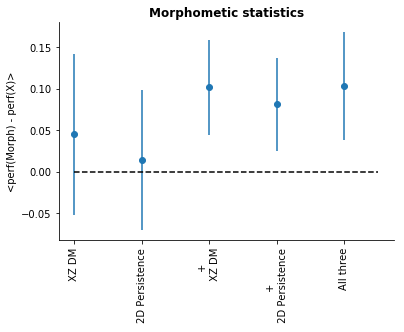

In [8]:
plt.errorbar(range(len(compare_morph_mean)),compare_morph_mean ,yerr=np.array(compare_morph_se)*2, linestyle="", marker='o')
plt.ylabel('<perf(Morph) - perf(X)>')
plt.title('Morphometic statistics', weight='bold')
_ = plt.gca().set_xticks(range(6))
_ = plt.gca().set_xticklabels(['XZ DM', '2D Persistence',  '+ \n XZ DM', 
                               '+ \n 2D Persistence', 'All three'], rotation=90)
plt.plot([0,4.5], [0,0], '--', c='k')
sns.despine()

print('mean: ', np.round(compare_morph_mean,2))
print('se: ',np.round(compare_morph_se, 2))
z = np.array(compare_morph_mean)/np.array(compare_morph_se)
print(np.round(z,2))
print(np.round(2*norm.sf(np.abs(z)),5))
                                          

## for V1 L5 only

mean d:  [0.16 0.07 0.17 0.15 0.17]
se:  [0.1  0.15 0.09 0.08 0.09]
z:  [1.52 0.47 1.93 1.8  1.92]
p-value:  [0.129 0.636 0.053 0.073 0.055]


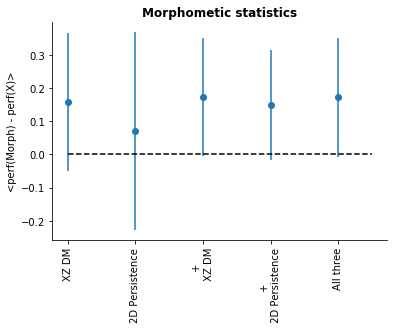

In [9]:
compare_morph_mean_l5 = []
compare_morph_se_l5 = []

for df in [df_dm, df_persistence, df_morph_and_dm, df_morph_and_pers,df_all]:
    compare_morph_mean_l5.append(np.mean(df_morph[df_morph['ds_id'] == 4]['log_loss_test'] - df[df['ds_id'] == 4]['log_loss_test']))
    compare_morph_se_l5.append(get_se_jk(jackknife_difference(df_morph[df_morph['ds_id'] == 4], df[df['ds_id'] == 4])))
    
plt.errorbar(range(len(compare_morph_mean_l5)),compare_morph_mean_l5 ,yerr=np.array(compare_morph_se_l5)*2, linestyle="", marker='o')
plt.ylabel('<perf(Morph) - perf(X)>')
plt.title('Morphometic statistics', weight='bold')
_ = plt.gca().set_xticks(range(5))
_ = plt.gca().set_xticklabels(['XZ DM', '2D Persistence',  '+ \n XZ DM', 
                               '+ \n 2D Persistence', 'All three'], rotation=90)
plt.plot([0,4.5], [0,0], '--', c='k')
sns.despine()

print('mean d: ', np.round(compare_morph_mean_l5,2))
print('se: ', np.round(compare_morph_se_l5,2))


z = np.array(compare_morph_mean_l5)/np.array(compare_morph_se_l5)
print('z: ', np.round(z,2))
print('p-value: ', np.round(2*norm.sf(np.abs(z)),3))
                                          

### compare performance of Density maps with others

In [10]:
compare_dm_mean = []
compare_dm_se = []

for df in [df_morph, df_dm_z, df_dm_yz, df_persistence, df_morph_and_dm, df_dm_and_pers,df_all]:
    compare_dm_mean.append(np.mean(jackknife_difference(df_dm.sort_values(['ds_id', 'group_a', 'group_b']),
                                                                          df.sort_values(['ds_id', 'group_a', 'group_b']))))
    compare_dm_se.append(get_se_jk(jackknife_difference(df_dm.sort_values(['ds_id', 'group_a', 'group_b']),
                                                                          df.sort_values(['ds_id', 'group_a', 'group_b']))))

mean d:  [-0.04 -0.01 -0.07 -0.03  0.06  0.02  0.06]
se:  [0.05 0.02 0.04 0.03 0.02 0.02 0.02]
z:  [-0.92 -0.37 -1.66 -1.17  2.35  1.44  2.59]
p-value:  [0.36 0.71 0.1  0.24 0.02 0.15 0.01]


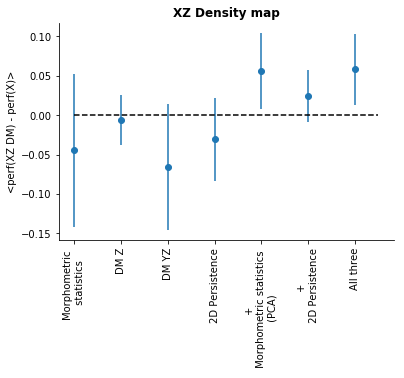

In [11]:
plt.errorbar(range(len(compare_dm_mean)),compare_dm_mean ,yerr=np.array(compare_dm_se)*2, linestyle="", marker='o')
plt.ylabel('<perf(XZ DM) - perf(X)>')
plt.title('XZ Density map', weight='bold')
_ = plt.gca().set_xticks(range(8))
_ = plt.gca().set_xticklabels(['Morphometric \n statistics', 'DM Z', 
                               'DM YZ','2D Persistence', '+ \n Morphometric statistics \n (PCA)', 
                               '+ \n 2D Persistence', 'All three'], rotation=90)
plt.plot([0,6.5], [0,0], '--', c='k')
sns.despine()

print('mean d: ', np.round(compare_dm_mean,2))
print('se: ',np.round(compare_dm_se, 2))
z = np.array(compare_dm_mean)/np.array(compare_dm_se)
print('z: ', np.round(z,2))
print('p-value: ' , np.round(2*norm.sf(np.abs(z)),2))

### compare performance of DM + Morphometrics PCA with others

In [12]:
compare_morph_and_dm_mean = []
compare_morph_and_dm_se = []

d1 = df_morph_and_dm
for df in [df_dm_and_pers,df_morph_and_pers, df_all]:
    compare_morph_and_dm_mean.append(np.mean(jackknife_difference(d1.sort_values(['ds_id', 'group_a', 'group_b']),
                                                                  df.sort_values(['ds_id', 'group_a', 'group_b']))))
    compare_morph_and_dm_se.append(get_se_jk(jackknife_difference(d1.sort_values(['ds_id', 'group_a', 'group_b']), 
                                                                  df.sort_values(['ds_id', 'group_a', 'group_b']))))

mean d:  [-0.033 -0.02   0.002]
se:  [0.02  0.012 0.009]
z:  [-1.66 -1.73  0.18]
p-value:  [0.097 0.083 0.855]


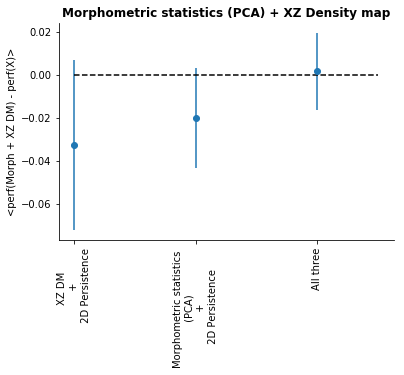

In [13]:
plt.errorbar(range(len(compare_morph_and_dm_mean)),compare_morph_and_dm_mean ,
             yerr=np.array(compare_morph_and_dm_se)*2, linestyle="", marker='o')
plt.ylabel('<perf(Morph + XZ DM) - perf(X)>')
plt.title('Morphometric statistics (PCA) + XZ Density map', weight='bold')
_ = plt.gca().set_xticks(range(3))
_ = plt.gca().set_xticklabels(['XZ DM \n + \n 2D Persistence' , 'Morphometric statistics \n (PCA) \n + \n 2D Persistence', 'All three'], rotation=90)
plt.plot([0,2.5], [0,0], '--', c='k')
sns.despine()

print('mean d: ', np.round(compare_morph_and_dm_mean,3))
print('se: ', np.round(compare_morph_and_dm_se,3))
z = np.array(compare_morph_and_dm_mean)/np.array(compare_morph_and_dm_se)
print('z: ', np.round(z,2))
print('p-value: ', np.round(2*norm.sf(np.abs(z)),3))

## Compare persistence with others

In [14]:
compare_per_mean = []
compare_per_se = []

d1 = df_persistence
for df in [df_dm, df_morph, df_dm_and_pers,df_morph_and_pers, df_all]:
    compare_per_mean.append(np.mean(jackknife_difference(d1.sort_values(['ds_id', 'group_a', 'group_b']),
                                                                  df.sort_values(['ds_id', 'group_a', 'group_b']))))
    compare_per_se.append(get_se_jk(jackknife_difference(d1.sort_values(['ds_id', 'group_a', 'group_b']), 
                                                         df.sort_values(['ds_id', 'group_a', 'group_b']))))

mean delta: [ 0.031 -0.014  0.055  0.067  0.089]
se:  [0.026 0.042 0.015 0.022 0.018]
z:  [ 1.17 -0.33  3.73  3.05  4.92]
p-values:  [2.438e-01 7.380e-01 2.000e-04 2.300e-03 0.000e+00]


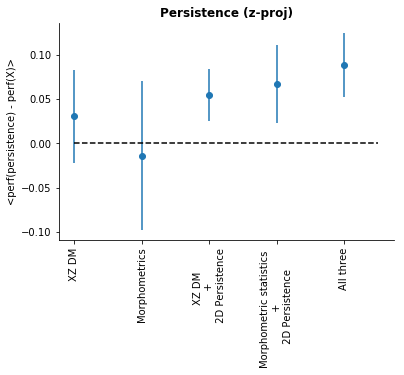

In [15]:
plt.errorbar(range(len(compare_per_mean)),compare_per_mean ,
             yerr=np.array(compare_per_se)*2, linestyle="", marker='o')
plt.ylabel('<perf(persistence) - perf(X)>')
plt.title('Persistence (z-proj)', weight='bold')
_ = plt.gca().set_xticks(range(6))
_ = plt.gca().set_xticklabels(['XZ DM','Morphometrics','XZ DM \n + \n 2D Persistence' , 'Morphometric statistics \n + \n 2D Persistence', 'All three'], rotation=90)
plt.plot([0,4.5], [0,0], '--', c='k')
sns.despine()

print('mean delta:', np.round(compare_per_mean,3))
print('se: ', np.round(compare_per_se,3))
z = np.array(compare_per_mean)/np.array(compare_per_se)
print('z: ', np.round(z,2))
print('p-values: ', np.round(2*norm.sf(np.abs(z)),4))

### compare performance of DM + Persistence with others

In [16]:
compare_per_and_dm_mean = []
compare_per_and_dm_se = []

d1 = df_dm_and_pers
for df in [df_morph_and_dm,df_morph_and_pers, df_all]:
    compare_per_and_dm_mean.append(np.mean(jackknife_difference(d1.sort_values(['ds_id', 'group_a', 'group_b']),
                                                                  df.sort_values(['ds_id', 'group_a', 'group_b']))))
    compare_per_and_dm_se.append(get_se_jk(jackknife_difference(d1.sort_values(['ds_id', 'group_a', 'group_b']), 
                                                                  df.sort_values(['ds_id', 'group_a', 'group_b']))))

mean delta:  [0.033 0.013 0.034]
se:  [0.02  0.022 0.014]
z:  [1.66 0.58 2.54]
p-value:  [0.097 0.559 0.011]


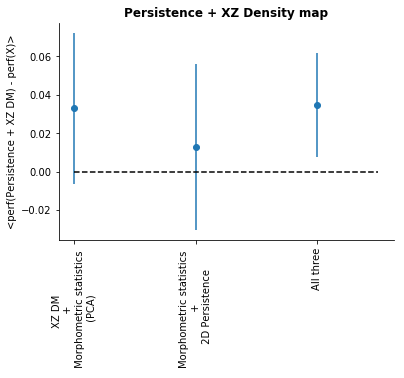

In [17]:
plt.errorbar(range(len(compare_per_and_dm_mean)),compare_per_and_dm_mean ,
             yerr=np.array(compare_per_and_dm_se)*2, linestyle="", marker='o')
plt.ylabel('<perf(Persistence + XZ DM) - perf(X)>')
plt.title('Persistence + XZ Density map', weight='bold')
_ = plt.gca().set_xticks(range(3))
_ = plt.gca().set_xticklabels(['XZ DM \n + \n Morphometric statistics \n (PCA)' , 'Morphometric statistics \n + \n 2D Persistence', 'All three'], rotation=90)
plt.plot([0,2.5], [0,0], '--', c='k')
sns.despine()


print('mean delta: ' ,np.round(compare_per_and_dm_mean,3))
print('se: ',np.round(compare_per_and_dm_se,3))
z = np.array(compare_per_and_dm_mean)/np.array(compare_per_and_dm_se)
print('z: ', np.round(z,2))
print('p-value: ', np.round(2*norm.sf(np.abs(z)),3))

### compare Morph + Persistence with others

In [18]:
compare_per_and_morph_mean = []
compare_per_and_morph_se = []

d1 = df_morph_and_pers
for df in [df_morph_and_dm,df_dm_and_pers, df_all]:
    compare_per_and_morph_mean.append(np.mean(jackknife_difference(d1.sort_values(['ds_id', 'group_a', 'group_b']),
                                                                  df.sort_values(['ds_id', 'group_a', 'group_b']))))
    compare_per_and_morph_se.append(get_se_jk(jackknife_difference(d1.sort_values(['ds_id', 'group_a', 'group_b']), 
                                                                  df.sort_values(['ds_id', 'group_a', 'group_b']))))

mean:  [ 0.02  -0.013  0.022]
se:  [0.012 0.022 0.01 ]
z:  [ 1.73 -0.58  2.11]
p-value:  [0.083 0.559 0.035]


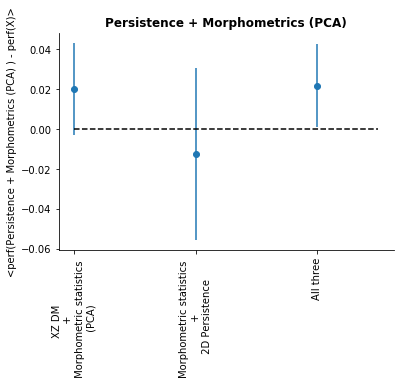

In [19]:
plt.errorbar(range(len(compare_per_and_morph_mean)),compare_per_and_morph_mean ,
             yerr=np.array(compare_per_and_morph_se)*2, linestyle="", marker='o')
plt.ylabel('<perf(Persistence + Morphometrics (PCA) ) - perf(X)>')
plt.title('Persistence + Morphometrics (PCA)', weight='bold')
_ = plt.gca().set_xticks(range(3))
_ = plt.gca().set_xticklabels(['XZ DM \n + \n Morphometric statistics \n (PCA)' , 'Morphometric statistics \n + \n 2D Persistence', 'All three'], rotation=90)
plt.plot([0,2.5], [0,0], '--', c='k')
sns.despine()


print('mean: ' ,np.round(compare_per_and_morph_mean,3))
print('se: ',np.round(compare_per_and_morph_se,3))
z = np.array(compare_per_and_morph_mean)/np.array(compare_per_and_morph_se)
print('z: ', np.round(z,2))
print('p-value: ', np.round(2*norm.sf(np.abs(z)),3))

## check if yz is significantly different for V1

In [20]:
m = np.mean(df_dm[df_dm['ds_id'] > 1]['log_loss_test'] - df_dm_yz[df_dm_yz['ds_id'] > 1]['log_loss_test'])
print(np.round(m,2))
se = get_se_jk(jackknife_difference(df_dm[df_dm['ds_id'] > 1], df_dm_yz[df_dm_yz['ds_id'] > 1]))
print(np.round(se,2))

z = m/se
print(np.round(z,2))
print(np.round(2*norm.sf(np.abs(z)),4))

-0.14
0.05
-2.84
0.0045


In [21]:
m = np.mean(df_dm['log_loss_test'] - df_dm_xy['log_loss_test'])
print(m)
se = get_se_jk(jackknife_difference(df_dm, df_dm_xy))
print(se)

z = m/se
print(np.round(z,2))
print(np.round(2*norm.sf(np.abs(z)),4))

-0.41952543232906603
0.04153567688268525
-10.1
0.0


## check if yz is significantly different for Bipolar cells

In [22]:
m = np.mean(df_dm[df_dm['ds_id'] == 1]['log_loss_test'] - df_dm_yz[df_dm_yz['ds_id'] == 1]['log_loss_test'])
print(np.round(m,2))
se = get_se_jk(jackknife_difference(df_dm[df_dm['ds_id'] == 1], df_dm_yz[df_dm_yz['ds_id'] == 1]))
print(np.round(se,2))

z = m/se
print(np.round(z,2))
print(np.round(2*norm.sf(np.abs(z)),4))

0.01
0.02
0.77
0.443
